# Data Exploration

In [1]:
'''
@vatsal
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# constants
PATH = '/Users/vatsalpatel/Desktop/'

MCI_PATH = 'projects/crime_analysis/data/MCI_2014_to_2017.csv'
ASSULT_PATH = 'projects/crime_analysis/data/Assault_2014_to_2019.csv'

COLS = ['event_unique_id', 'occurrencedate', 'reporteddate', 'premisetype',
        'offence', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
        'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long']

# The mapping is associating the neighbourhood to the burrough
# 1 = 'Downtown Toronto', 3 = 'North York', 4 = 'Scarborough', 6 = 'Etobicoke / Missisauga'
BURROUGH_MAP_DICT = {
    'Black Creek (24)' : 1,
    'Eringate-Centennial-West Deane (11)' : 6,
    'Bendale (127)' : 4,
    'Cabbagetown-South St.James Town (71)' : 1,
    'Woburn (137)' : 3,
    'Bedford Park-Nortown (39)' : 3,
    'Mount Pleasant East (99)' : 1,
    "O'Connor-Parkview (54)" : 4,
    'Parkwoods-Donalda (45)' : 3,
    'South Riverdale (70)' : 1,
    'Danforth East York (59)' : 4,
    'Dufferin Grove (83)' : 1,
    'Eglinton East (138)' : 4,
    'Milliken (130)' : 4,
    "L'Amoreaux (117)" : 4,
    'East End-Danforth (62)' : 4,
    'Kensington-Chinatown (78)' : 1,
    'St.Andrew-Windfields (40)' : 3,
    'Banbury-Don Mills (42)' : 4,
    'Greenwood-Coxwell (65)' : 4,
    'Beechborough-Greenbrook (112)' : 4,
    'York University Heights (27)' : 3,
    'Kingsview Village-The Westway (6)' : 6,
    'Victoria Village (43)' : 3,
    'Humbermede (22)' : 6,
    'Yonge-Eglinton (100)' : 1,
    'Dorset Park (126)' : 4,
    'Waterfront Communities-The Island (77)' : 1,
    'High Park North (88)' : 6,
    'Alderwood (20)' : 6, 
    'Niagara (82)' : 1,
    'Regent Park (72)' : 1,
    'Cliffcrest (123)' : 4,
    'Birchcliffe-Cliffside (122)' : 4,
    'West Hill (136)' : 4,
    'Church-Yonge Corridor (75)' : 1,
    'Rockcliffe-Smythe (111)' : 6,
    'Junction Area (90)' : 6,
    'Mount Olive-Silverstone-Jamestown (2)' : 6,
    'Moss Park (73)' : 1,
    'Rexdale-Kipling (4)' : 6,
    'Agincourt South-Malvern West (128)' : 4,
    'Clanton Park (33)' : 3,
    'Clairlea-Birchmount (120)' : 4,
    'Humber Heights-Westmount (8)' : 6,
    'North Riverdale (68)' : 6,
    'Guildwood (140)' : 4,
    'West Humber-Clairville (1)' : 6,
    'Weston (113)' : 6,
    'University (79)' : 1,
    'Bridle Path-Sunnybrook-York Mills (41)' : 3,
    'Kennedy Park (124)' : 4,
    'Bayview Village (52)' : 3,
    'Mimico (includes Humber Bay Shores) (17)' : 6,
    'Little Portugal (84)' : 1,
    'Downsview-Roding-CFB (26)' : 3,
    'Annex (95)' : 1,
    'Newtonbrook West (36)' : 1,
    'Woodbine Corridor (64)' : 4,
    'Wexford/Maryvale (119)' : 4,
    'Rosedale-Moore Park (98)' : 1,
    "Tam O'Shanter-Sullivan (118)" : 4,
    'Taylor-Massey (61)' : 4,
    'Islington-City Centre West (14)' : 6,
    'Steeles (116)' : 3,
    'Playter Estates-Danforth (67)' : 1,
    'Forest Hill South (101)' : 1,
    'Old East York (58)' : 4,
    'Forest Hill North (102)' : 1, 
    'Flemingdon Park (44)' : 3,
    'Don Valley Village (47)' : 3,
    'Rouge (131)' : 4,
    'Oakwood Village (107)' : 1,
    'North St.James Town (74)' : 3,
    'Westminster-Branson (35)' : 3,
    'New Toronto (18)' : 1,
    'Etobicoke West Mall (13)' : 1,
    'Newtonbrook East (50)' : 3,
    'Yorkdale-Glen Park (31)' : 3,
    'Casa Loma (96)' : 1,
    'Markland Wood (12)' : 6, 
    'Trinity-Bellwoods (81)' : 1,
    'South Parkdale (85)' : 3,
    'Ionview (125)' : 4,
    'Caledonia-Fairbank (109)' : 1,
    'Woodbine-Lumsden (60)' : 4,
    'Dovercourt-Wallace Emerson-Junction (93)' : 1,
    'Highland Creek (134)' : 4,
    'Glenfield-Jane Heights (25)' : 6,
    'Humewood-Cedarvale (106)' : 6,
    'Briar Hill-Belgravia (108)' : 1,
    'Willowdale West (37)' : 3,
    'Oakridge (121)' : 4,
    'Roncesvalles (86)' : 1,
    'Bay Street Corridor (76)' : 1,
    'Broadview North (57)' : 1,
    'Runnymede-Bloor West Village (89)' : 6,
    'Willowridge-Martingrove-Richview (7)' : 6,
    'The Beaches (63)' : 4,
    'Agincourt North (129)' : 4,
    'Malvern (132)' : 6,
    'Palmerston-Little Italy (80)' : 1,
    'Morningside (135)' : 4,
    'Long Branch (19)' : 6, 
    'Weston-Pellam Park (91)' : 6,
    'Hillcrest Village (48)' : 1,
    'Stonegate-Queensway (16)' : 6,
    'Thorncliffe Park (55)' : 4,
    'Willowdale East (51)' : 3,
    'Kingsway South (15)' : 6,
    'Elms-Old Rexdale (5)' : 6,
    'Lansing-Westgate (38)' : 3,
    'Leaside-Bennington (56)' : 1,
    'Humber Summit (21)' : 6,
    'Brookhaven-Amesbury (30)' : 3,
    'Mount Dennis (115)' : 1,
    'Bayview Woods-Steeles (49)' : 4,
    'Blake-Jones (69)' : 4,
    'Rustic (28)' : 1,
    'Scarborough Village (139)' : 4,
    'Yonge-St.Clair (97)' : 1,
    'Edenbridge-Humber Valley (9)' : 6,
    'Pelmo Park-Humberlea (23)' : 6,
    'Bathurst Manor (34)' : 3,
    'Thistletown-Beaumond Heights (3)' : 6,
    'Lambton Baby Point (114)' : 6,
    'Princess-Rosethorn (10)' : 6,
    'Wychwood (94)' : 1,
    'Pleasant View (46)' : 3,
    'Danforth (66)' : 4,
    'Henry Farm (53)' : 3,
    'Keelesdale-Eglinton West (110)' : 1,
    'Lawrence Park South (103)' : 1,
    'Mount Pleasant West (104)' : 1,
    'Maple Leaf (29)' : 1,
    'High Park-Swansea (87)' : 6,
    'Englemount-Lawrence (32)' : 3,
    'Corso Italia-Davenport (92)' : 1,
    'Lawrence Park North (105)' : 6,
    'Centennial Scarborough (133)' : 4
}

In [3]:
mci_df = pd.read_csv(PATH + MCI_PATH)
assult_df = pd.read_csv(PATH + ASSULT_PATH)


In [4]:
mci_df = mci_df[COLS]
assult_df = assult_df[COLS]


In [5]:
sys.path.insert(1, '../src')

from crime import MCI_Crime

In [6]:
cf = MCI_Crime()

In [9]:
mci_df = cf.limit_years(df = mci_df, year = 2014)

In [10]:
mci_df = cf.mapping_neighbourhoods(df = mci_df, mapping_dict = BURROUGH_MAP_DICT)

In [18]:
feat_cols = ['feat_MCI', 'feat_premisetype', 'feat_offence', 
             'occurrenceyear', 'occurrencemonth', 'feat_occurrencedayofweek', 
             'occurrencehour', 'Burrough']

In [16]:
MCI_MAPPING = {
'Assault' : 1,
'Break and Enter' : 2,
'Robbery' : 3,
'Theft Over' : 4,
'Auto Theft' : 5
}
PREMISETYPE_MAPPING = {
    'Outside' : 1,
    'House' : 2,
    'Commercial' : 3,
    'Apartment' : 4,
    'Other' : 5
}
MONTH_MAPPING = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}
DAY_MAPPING = {
    'Monday    ' : 1,
    'Tuesday   ' : 2,
    'Wednesday ' : 3,
    'Thursday  ' : 4,
    'Friday    ' : 5,
    'Saturday  ' : 6,
    'Sunday    ' : 7
}
#         mapping_dicts = list(MCI_MAPPING) + list(PREMISETYPE_MAPPING) + list(MONTH_MAPPING) + list(DAY_MAPPING)

mci_df['feat_MCI'] = mci_df['MCI']
mci_df['feat_premisetype'] = mci_df['premisetype']
mci_df['feat_occurrencemonth'] = mci_df['occurrencemonth']
mci_df['feat_occurrencedayofweek'] = mci_df['occurrencedayofweek']

mci_df.replace({'feat_MCI' : MCI_MAPPING}, inplace = True)
mci_df.replace({'feat_premisetype' : PREMISETYPE_MAPPING}, inplace = True)
mci_df.replace({'feat_occurrencemonth' : MONTH_MAPPING}, inplace = True)
mci_df.replace({'feat_occurrencedayofweek' : DAY_MAPPING}, inplace = True)
mci_df['feat_offence'] = pd.factorize(mci_df['offence'].tolist())[0]

In [20]:
mci_df.corr()

,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Lat,Long,Burrough,feat_MCI,feat_premisetype,feat_occurrencemonth,feat_occurrencedayofweek,feat_offence
reportedyear,1.000000,0.007712,-0.008336,-0.002715,0.994066,0.007349,-0.000053,0.001710,-0.002583,-0.005403,-0.006546,-0.009094,-0.013100,0.010466,-0.001584,0.008251,0.003658
reportedday,0.007712,1.000000,0.083744,-0.001104,0.010002,0.857939,0.074915,-0.000875,0.002974,-0.003457,-0.000050,-0.004665,-0.002892,-0.001835,0.001735,-0.000378,-0.002565
reporteddayofyear,-0.008336,0.083744,1.000000,-0.000537,0.000519,0.073752,0.962893,0.003719,-0.004264,-0.007870,-0.006480,0.002770,0.014161,-0.029554,0.960409,-0.002155,0.011724
reportedhour,-0.002715,-0.001104,-0.000537,1.000000,-0.004232,-0.004819,-0.001387,0.601448,0.002029,0.058259,0.019002,0.034123,-0.037654,0.007423,-0.000992,-0.070910,-0.050914
occurrenceyear,0.994066,0.010002,0.000519,-0.004232,1.000000,0.011089,-0.005853,0.007597,-0.001865,-0.006736,-0.006226,-0.009487,-0.013020,0.007418,-0.007712,0.009760,0.004048
occurrenceday,0.007349,0.857939,0.073752,-0.004819,0.011089,1.000000,0.088972,0.014477,0.003843,-0.009918,-0.001629,-0.008834,0.000222,-0.006850,0.003641,0.000733,0.000119
occurrencedayofyear,-0.000053,0.074915,0.962893,-0.001387,-0.005853,0.088972,1.000000,0.008351,-0.006401,-0.010071,-0.009021,0.001924,0.013769,-0.030305,0.996327,-0.003392,0.010211
occurrencehour,0.001710,-0.000875,0.003719,0.601448,0.007597,0.014477,0.008351,1.000000,-0.020785,0.058377,-0.010089,0.055606,0.064884,-0.039555,0.007138,-0.065181,0.078570
Hood_ID,-0.002583,0.002974,-0.004264,0.002029,-0.001865,0.003843,-0.006401,-0.020785,1.000000,0.202445,0.790917,-0.200265,-0.103954,0.023393,-0.006766,0.003389,-0.110126
Lat,-0.005403,-0.003457,-0.007870,0.058259,-0.006736,-0.009918,-0.010071,0.058377,0.202445,1.000000,0.348020,0.262183,0.058583,-0.029837,-0.009330,-0.036400,0.047302


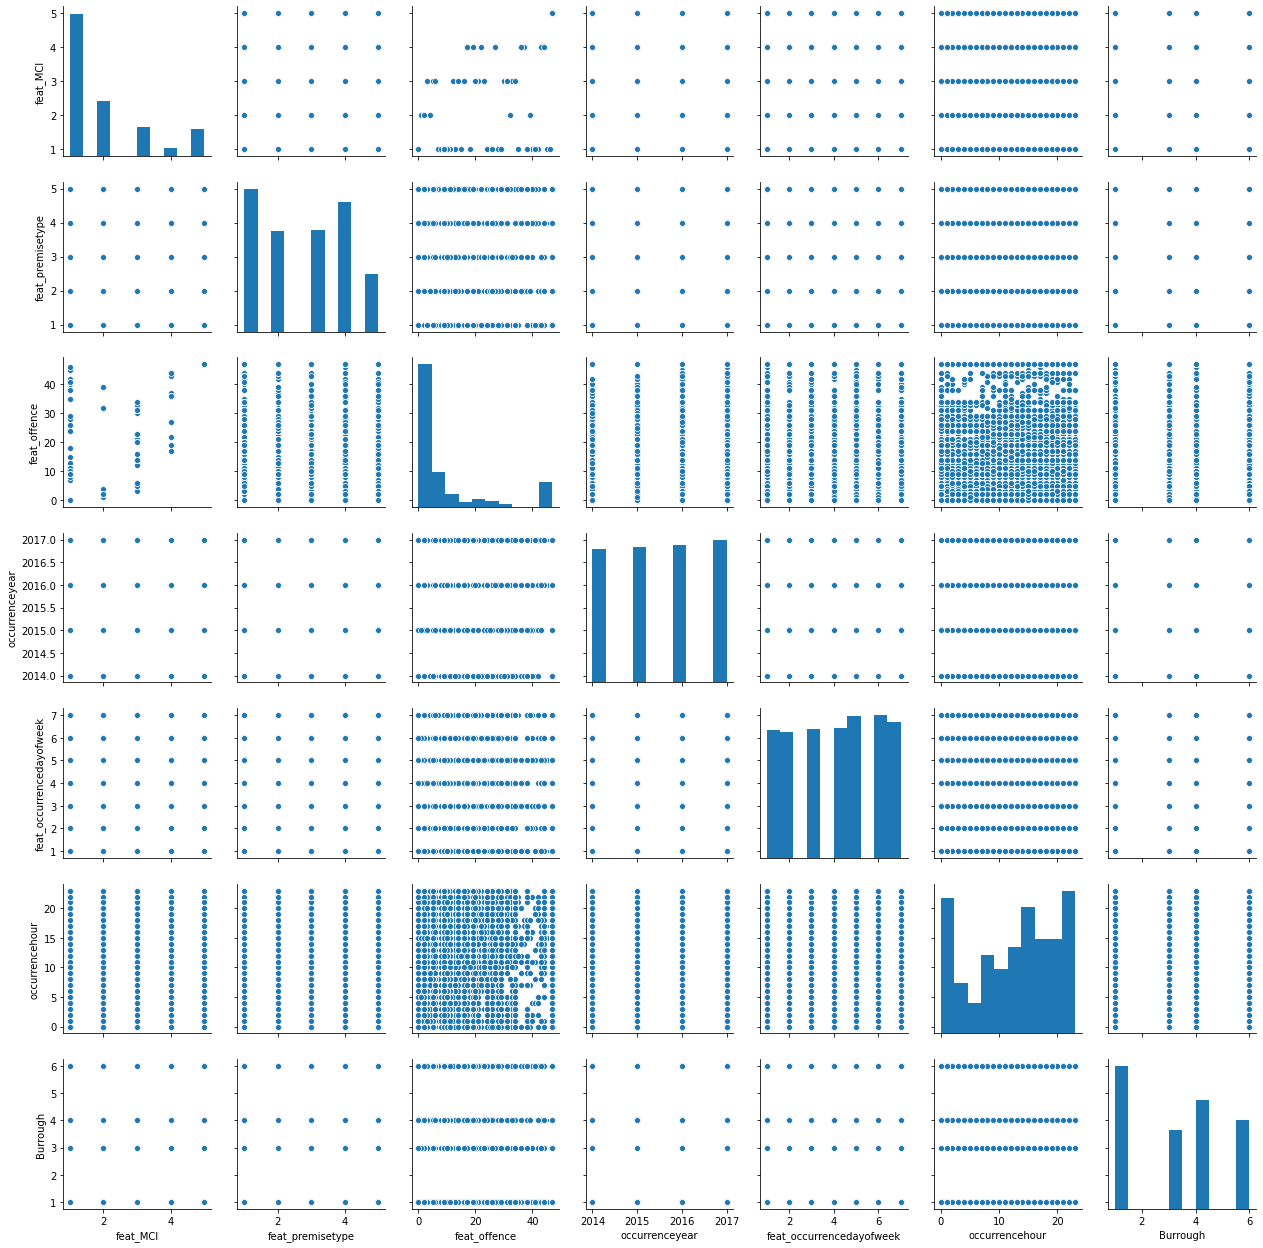

In [19]:
sns.pairplot(mci_df[feat_cols])